# Data Exploration & Image Pre-Processing

In the first assignment of this course, you will work with chest x-ray images taken from the public [ChestX-ray8 dataset](https://arxiv.org/abs/1705.02315). In this notebook, you'll get a chance to explore this dataset and familiarize yourself with some of the techniques you'll use in the first graded assignment.

### Modified for tensorflow 2

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()
from pprint import pprint

import tensorflow as tf

In [2]:
img_dir            = '../../data/nih/images-small'
target_w, target_h = 320, 320

batch_size        = 16

## 1. Exploration

In [3]:
train_df = pd.read_csv("../../data/nih/train-small.csv")
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head(2)

There are 1000 rows and 16 columns in this data frame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0


Have a look at the various columns in this csv file. The file contains the names of chest x-ray images ("Image" column) and the columns filled with ones and zeros identify which diagnoses were given based on each x-ray image.

### 1.1 Data Types and Null Values Check

In [4]:
display(train_df.info())
print(f"\n{train_df.shape = }")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

None


train_df.shape = (1000, 16)


### 1.2 Unique IDs Check

"PatientId" has an identification number for each patient. One thing you'd like to know about a medical dataset like this is if you're looking at repeated data for certain patients or whether each image represents a different person.

In [5]:
print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]} ")

The total patient ids are 1000, from those the unique ids are 928 


As you can see, the number of unique patients in the dataset is less than the total number so there must be some overlap. For patients with multiple records, you'll want to make sure they do not show up in both training and test sets in order to avoid data leakage (covered later in this week's lectures).

### 1.3 Data Labels

In [6]:
columns = list(train_df.columns)

In [7]:
# Remove unnecesary elements
columns.remove('Image')
columns.remove('PatientId')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions:")
pprint(columns)
labels = columns

There are 14 columns of labels for these conditions:
['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']


Run the next cell to print out the number of positive labels (1's) for each condition

In [8]:
# Print out the number of positive labels for each class
for column in columns:
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


Have a look at the counts for the labels in each class above. Does this look like a balanced dataset?

### 1.4 Data Visualization

Random images with positive diagnoses


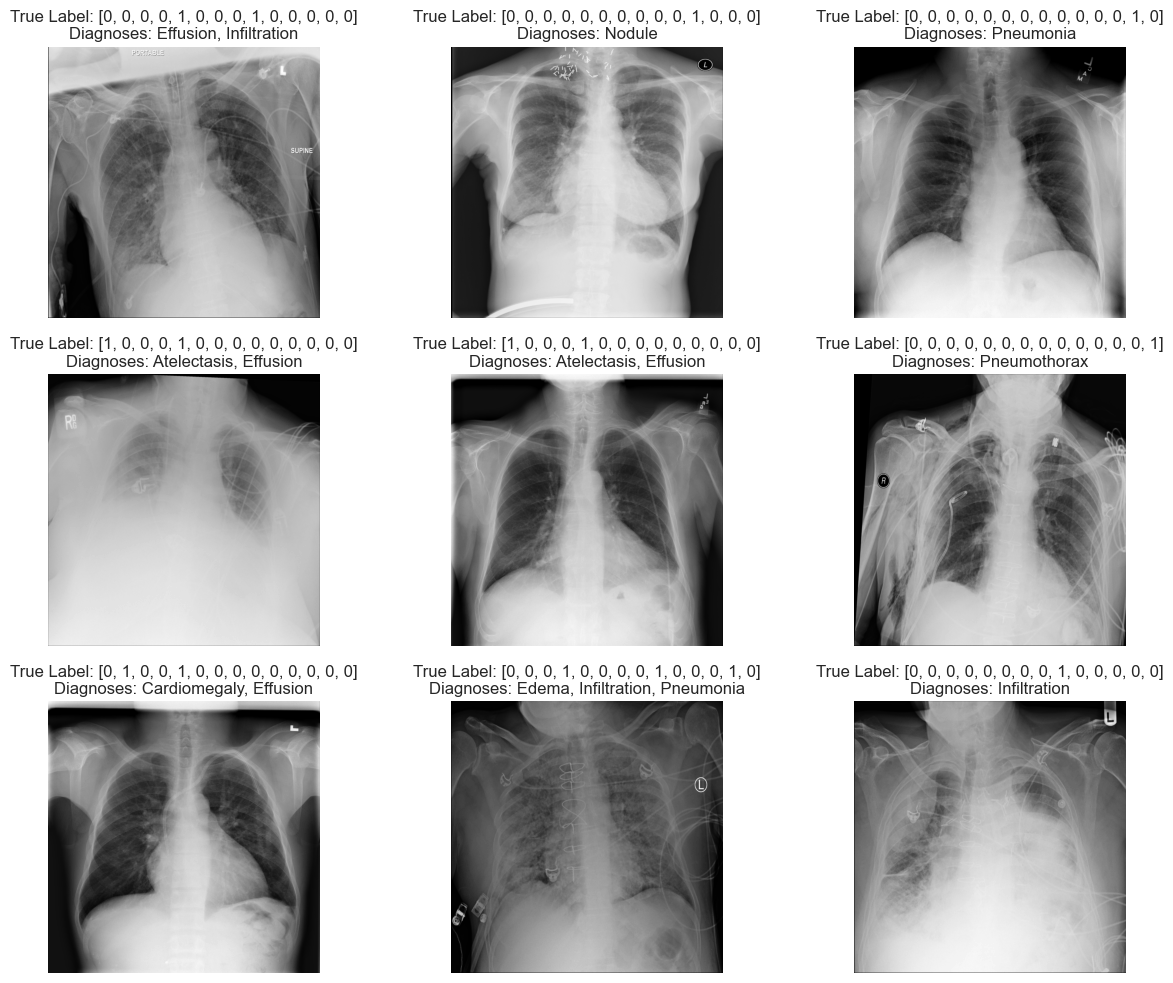

In [9]:
random_rows = train_df.sample(n=90)
print("Random images with positive diagnoses")

num_imgs = 0
plt.figure(figsize=(15, 10))  # 15 units wide, 10 units tall
for i in range(90):
    if num_imgs >= 9: 
        break
        
    this_row       = random_rows.iloc[i]
    this_row_image = this_row['Image']
    this_row_label = list(random_rows.iloc[i].drop(['Image', 'PatientId']))

    # Associate 1 in this_row_label with the text of the disease
    diagnoses = [labels[j] for j in range(len(this_row_label)) if this_row_label[j] == 1]

    if not diagnoses:
        title_text = f"True Label: {this_row_label}\nDiagnoses: None"
        continue
    
    num_imgs += 1
    title_text = f"True Label: {this_row_label}\nDiagnoses: {', '.join(diagnoses)}"
    
    plt.subplot(3, 3, num_imgs)  # Change to num_imgs to keep it within 1-9
    img = plt.imread(os.path.join(img_dir, this_row_image))
    plt.imshow(img, cmap='gray')
    plt.title(title_text)
    plt.axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Random healthy images


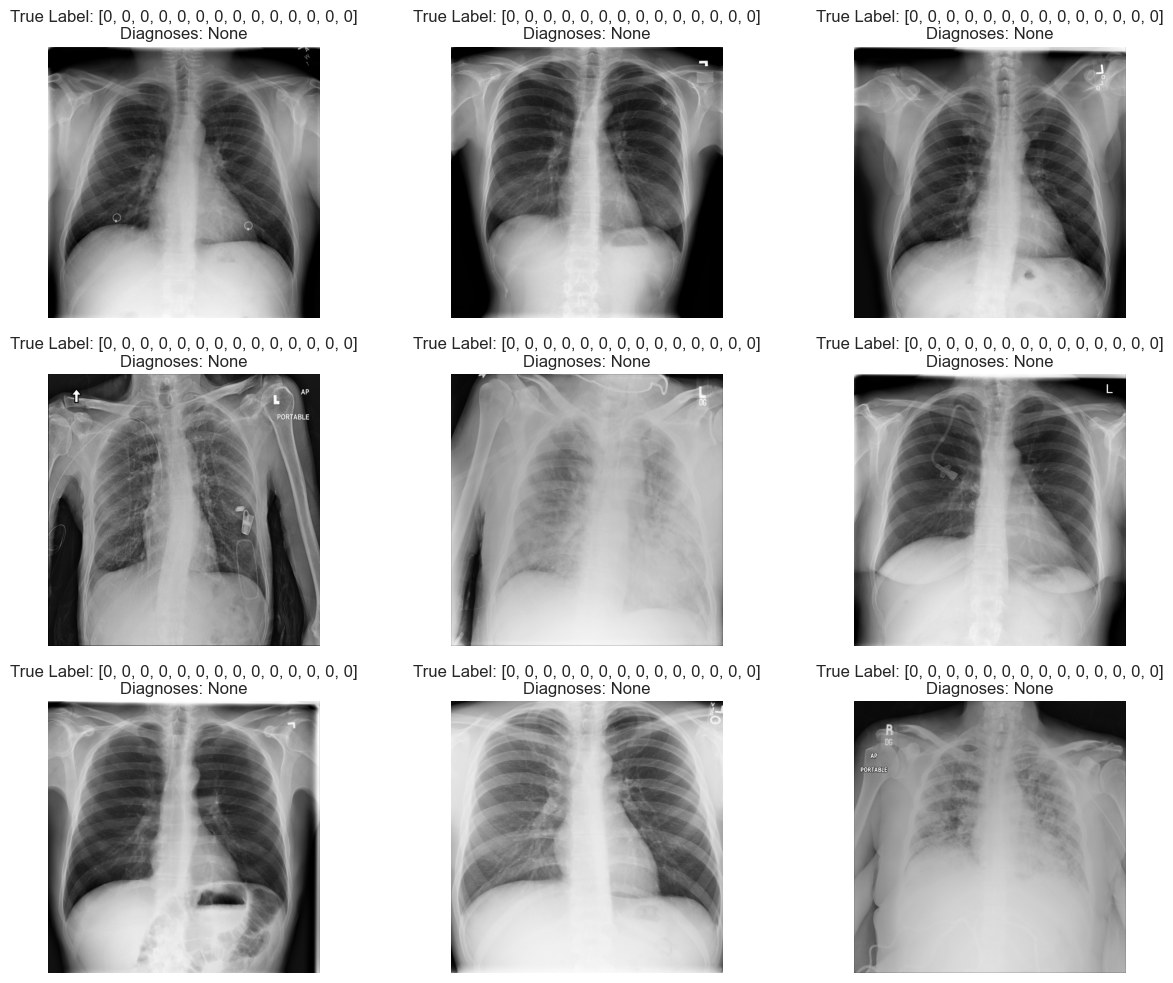

In [10]:
print("Random healthy images")

num_imgs = 0
plt.figure(figsize=(15, 10))  # 15 units wide, 10 units tall
for i in range(90):
    if num_imgs >= 9: 
        break
        
    this_row       = random_rows.iloc[i]
    this_row_image = this_row['Image']
    this_row_label = list(random_rows.iloc[i].drop(['Image', 'PatientId']))

    # Associate 1 in this_row_label with the text of the disease
    diagnoses = [labels[j] for j in range(len(this_row_label)) if this_row_label[j] == 1]

    if diagnoses:
        title_text = f"True Label: {this_row_label}\nDiagnoses: {', '.join(diagnoses)}"
        continue
    
    num_imgs += 1
    title_text = f"True Label: {this_row_label}\nDiagnoses: None"
    
    plt.subplot(3, 3, num_imgs)  # Change to num_imgs to keep it within 1-9
    img = plt.imread(os.path.join(img_dir, this_row_image))
    plt.imshow(img, cmap='gray')
    plt.title(title_text)
    plt.axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### 1.5 Investigating a Single Image

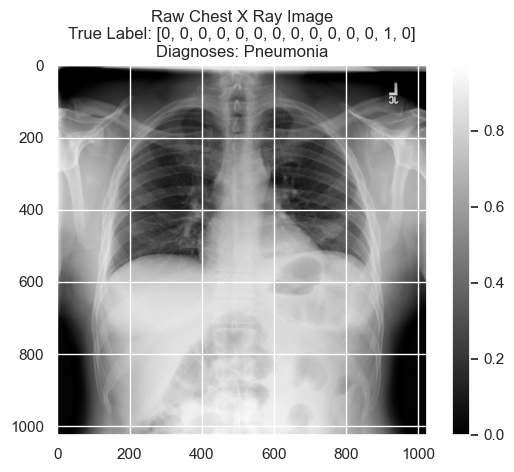

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9725 and the minimum is 0.0000
The mean value of the pixels is 0.5258 and the standard deviation is 0.2693


In [11]:
# Get the first image that was listed in the train_df dataframe
random_rows = train_df.sample(n=10)

for i in range(10):
    this_row       = random_rows.iloc[i]
    this_row_image = this_row['Image']
    this_row_label = list(random_rows.iloc[i].drop(['Image','PatientId']))

    raw_image = plt.imread(os.path.join(img_dir, this_row_image))

    # associate 1 in this_row_label with the text of the disease
    diagnoses = [labels[j] for j in range(len(this_row_label)) if this_row_label[j] == 1]
    
    if diagnoses:
        title_text = f"True Label: {this_row_label}\nDiagnoses: {', '.join(diagnoses)}"
        break
    else:
        title_text = f"True Label: {this_row_label}\nDiagnoses: None"


plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image\n'+title_text)
plt.show()
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

## 2. Image Preprocessing in Keras

Before training, you'll first modify your images to be better suited for training a convolutional neural network. For this task you'll use the Keras [ImageDataGenerator](https://keras.io/preprocessing/image/) function to perform data preprocessing and data augmentation.

### No, we won't: ImageDataGenerator is deprecated


In [12]:
# Normalize images
def normalize_image(image):
    '''the densenet family has its own preprocessor'''

    x = tf.keras.preprocessing.image.img_to_array(image)
    # expand_dims is incompatible with .batch(batch_size)
    #x = np.expand_dims(x, axis=0)
    
    x = tf.keras.applications.densenet.preprocess_input(x)
    
    return x

# Resize images to (target_w, target_h)
def process_image(image_path):
    '''load the image and call normalize_image'''
    try:
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(target_w, target_h))
        image = normalize_image(image)
        return image
    except Exception as e:
        print(f"Warning: Could not process image at {image_path}. Error: {e}")
        return None

# Helper function to create datasets and track missing images
def create_dataset(df, labels, image_dir):
    '''create lists of pre-processed images and their labels
        and return tf.data.Dataset.from_tensor_slices'''
    image_paths = [os.path.join(image_dir, img) for img in df["Image"]]
    processed_images = []
    label_values     = []
    
    missing_images_count = 0  # Initialize counter for missing images
    found_images_count   = 0

    for img_path, label in zip(image_paths, df[labels].values):
        if os.path.exists(img_path):
            processed_image = process_image(img_path)
            if processed_image is not None:
                processed_images.append(processed_image)
                label_values.append(label)
                found_images_count += 1
        else:
            print(f"Warning: Image not found at {img_path}")
            missing_images_count += 1  # Increment counter if image is missing

    # Convert labels to numpy arrays
    label_values = np.array(label_values)

    # Print the count of missing images
    print(f"Total number of missing images: {missing_images_count}")
    print(f"Total number of images found:   {found_images_count}")

    return tf.data.Dataset.from_tensor_slices((processed_images, label_values))

# Create datasets
print(f"Processing train_df")
train_dataset = create_dataset(train_df, labels, img_dir)

train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(buffer_size=int(len(train_df)/2))

# from tensorflow_utils import combine_features
# train_dataset   = train_dataset.map(lambda x, y: (combine_features(x), y), num_parallel_calls=tf.data.AUTOTUNE)
train_generator = train_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)


# # d) Cache, batch and prefetch datasets; shuffle only the training set
# train_generator = (
#     train_dataset
#     .shuffle(len(train_df))  # Shuffle only the training set
#     .batch(batch_size)
#     .cache()
#     .prefetch(buffer_size=tf.data.AUTOTUNE)
# )

print(f"\nTrain Generator: {train_generator}\n")

Processing train_df
Total number of missing images: 0
Total number of images found:   1000

Train Generator: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 320, 320, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 14), dtype=tf.int64, name=None))>



2024-10-14 19:53:00.300882: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-10-14 19:53:00.300912: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-14 19:53:00.300917: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-14 19:53:00.300930: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-14 19:53:00.300940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# Verify the shapes of the features and labels in the combined dataset
print("\nFor train_dataset")
for feature_batch, label_batch in train_generator.take(1):
    print(f"Combined Feature Batch Shape (batch size, height, width, depth): {feature_batch.shape}")
    print(f"Label Batch Shape            (batch size, number of classes):    {label_batch.shape}")


For train_dataset
Combined Feature Batch Shape (batch size, height, width, depth): (16, 320, 320, 3)
Label Batch Shape            (batch size, number of classes):    (16, 14)


2024-10-14 19:53:49.209969: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-10-14 19:53:49.210089: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-10-14 19:53:49.533877: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-10-14 19:53:49.583784: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5702832].



Random Image Shape: (320, 320, 3)
Random Label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


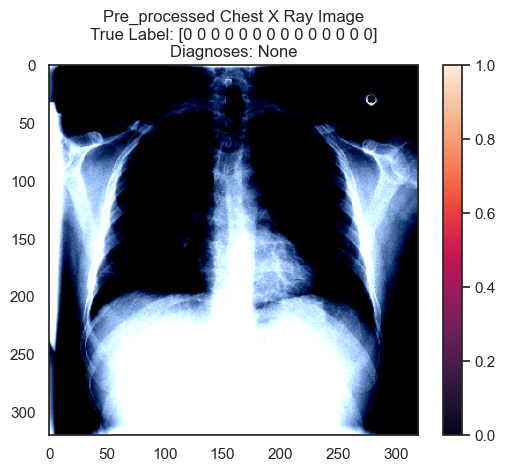

The dimensions of the image are 320 pixels width and 3 pixels height
The maximum pixel value is 2.5703 and the minimum is -2.1179
The mean value of the pixels is 0.1488 and the standard deviation is 1.1588


In [14]:
# Plot a processed image
sns.set_style("white")

# Take one batch from the train_generator
for batch_images, batch_labels in train_generator.take(1):      # Takes the first batch
    # Choose a random index within the batch
    random_index = np.random.randint(0, batch_images.shape[0])  # Choose a random image in the batch

    # Extract the random image and its corresponding label
    random_image = batch_images[random_index]
    random_label = batch_labels[random_index]

    print(f"\nRandom Image Shape: {random_image.shape}")
    print(f"Random Label: {random_label}")

# Convert the tensor to a NumPy array
random_image_np = random_image.numpy()
random_label_np = random_label.numpy()

# associate 1 in this_row_label with the text of the disease
diagnoses = [labels[j] for j in range(len(random_label_np)) if random_label_np[j] == 1]

if diagnoses:
    title_text = f"True Label: {random_label_np}\nDiagnoses: {', '.join(diagnoses)}"
else:
    title_text = f"True Label: {random_label_np}\nDiagnoses: None"

plt.imshow(random_image)
plt.colorbar()
plt.title('Pre_processed Chest X Ray Image\n'+title_text)
plt.show()


print(f"The dimensions of the image are {random_image_np.shape[1]} pixels width and {random_image_np.shape[2]} pixels height")
print(f"The maximum pixel value is {random_image_np.max():.4f} and the minimum is {random_image_np.min():.4f}")
print(f"The mean value of the pixels is {random_image_np.mean():.4f} and the standard deviation is {random_image_np.std():.4f}")

Run the cell below to see a comparison of the distribution of pixel values in the new pre-processed image versus the raw image.

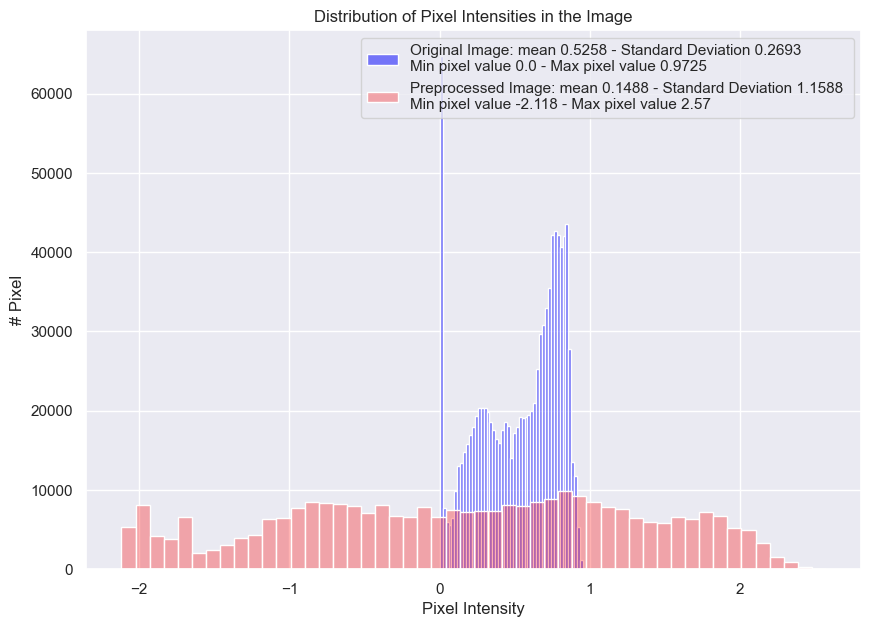

In [15]:
# Set Seaborn style
sns.set()

# Create a single figure and axis
plt.figure(figsize=(10, 7))

# Plot histogram for the original image
sns.histplot(raw_image.ravel(),
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n'
                   f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue',
             kde=False,
             stat="count",
             bins=50,  # Number of bins
             alpha=0.5)

# Plot histogram for the generated image
sns.histplot(random_image_np.ravel(),
             label=f'Preprocessed Image: mean {np.mean(random_image_np):.4f} - Standard Deviation {np.std(random_image_np):.4f} \n'
                   f'Min pixel value {np.min(random_image_np):.4} - Max pixel value {np.max(random_image_np):.4}',
             color='red',
             kde=False,
             stat="count",
             bins=50,
             alpha=0.3)


# Add legends, labels, and title
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')
plt.show()